# Unit Root Tests

<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/07-Unit-Root-Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Random walk model without a drift

$$
\begin{align}
x_{t} = x_{t - 1} + e_{t}, e_t \sim N(0, \sigma^2)\\
\Delta x_{t} = x_{t} - x_{t - 1} = e_{t}\\
f' = \lim_{\epsilon \to 0}\frac{f(x) - f(x + \epsilon)}{\epsilon}
\end{align}
$$

The solution of the characteristic equation of this model is equal to one. We say that *the equation has a unit root*.

$$
\lambda - 1 = 0 \implies \\
\lambda^* = 1
$$

The solution of this characteristic equation is 1. We say that the characteristic equation has a unit root.

ARIMA(0, 1, 0)

## Random Walks Simulation



<Axes: >

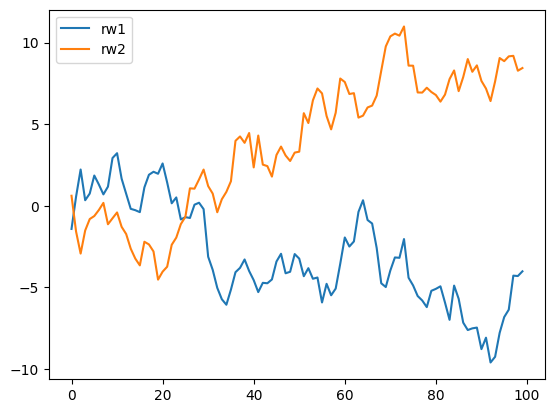

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt


rw1 = np.cumsum(np.random.normal(size=100))
rw2 = np.cumsum(np.random.normal(size=100))

df_rw = pd.DataFrame({"rw1": rw1, "rw2": rw2})

df_rw.plot()

In [3]:
from statsmodels.formula.api import ols
import pandas as pd

ols_fit = ols("rw2 ~ rw1", data = df_rw).fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rw2   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           7.16e-18
Time:                        22:12:17   Log-Likelihood:                -247.32
No. Observations:                 100   AIC:                             498.6
Df Residuals:                      98   BIC:                             503.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8045      0.407      1.976      0.051      -0.003       1.612
rw1           -0.9963      0.094    -10.566      0.000      -1.183      -0.809
==============================================================================
Omnibus:                        2.083   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.837
Skew:                           0.332   Prob(JB):                        0.399
Kurtosis:                       2.990   Cond. No.                         6.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
x_{t}: \text{ random walk 2} \\
x_{t}: \text{ random walk 1} \\
x_{t} = \beta_0 + \beta_1 x_{t} + u_{t}, u_{t} \sim N(0, \sigma^2)
$$

Estimated regression equation

$$
\hat{y}_{t} = 6.15 - 1.78 x_{t}
$$

T-Test of the hypothesis 

$$
H_0: \beta_1 = 0\\
H_1: \beta_1 \neq 0
$$
We reject the null hypothesis if the p-value of the test is less than 0.05 (convention).

Spurious regression if y and x are unit-root processes.

$$
\hat{y}_{t} = -1.86 + 0.19 x_{t}
$$

## How to check for spurious regression?



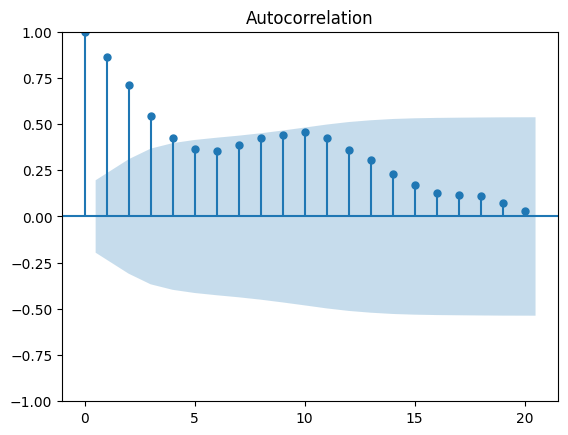

In [4]:
# acf of residuals:

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ols_fit.resid)
plt.show()

## Dickey-Fuller Test

AR(1) process without a constant

$$
x_{t} = \phi_1 x_{t - 1} + e_{t}, e_t \sim WN(\sigma^2)
$$

If the process has a unit root, it follows that $\phi_1 = 1$. We would like to test the hypothesis:

$$
H_0: \phi_1 = 1 \\
H_1: \phi_1 < 1
$$

The first difference of the random walk process is stationary, because it is
simply equal to the pure random process $e_{t}$ and it is stationary by the properties of the pure random process. We say that the process (in this case the random walk process) is integrated of order 1.

## Dickey-Fuller Unit Root Test

$$
\begin{align}
x_{t} - x_{t - 1} = \phi_1 x_{t - 1} + e_{t} - x_{t - 1} \\
\iff\\
\Delta x_{t} = (\phi_1 - 1)x_{t - 1} + e_t
\end{align}
$$

$$
\phi_1 - 1 = 0 \iff \phi_1 = 1
$$

We can use the t-statistic for testing the hypothesis that the coefficient 
of $x_{t - 1}$ equals 0, but the distribution of this statistic under the $H_0$ (assuming that $\phi_1 = 1$) is not a t-distribution. Therefore, we need to use
special critical values in order to perform the test.

In [5]:
df_rw["rw1_l1"] = df_rw["rw1"].shift(1)
df_rw["rw1_diff"] = df_rw["rw1"].diff()
df_rw

,rw1,rw2,rw1_l1,rw1_diff
0,-1.413378,0.619303,NaN,NaN
1,0.565222,-1.574072,-1.413378,1.978599
2,2.225574,-2.923384,0.565222,1.660352
3,0.344968,-1.508634,2.225574,-1.880606
4,0.752711,-0.807416,0.344968,0.407743
...,...,...,...,...
95,-6.811130,8.863222,-7.777489,0.966360
96,-6.358540,9.156810,-6.811130,0.452590
97,-4.274124,9.189454,-6.358540,2.084416
98,-4.298444,8.276461,-4.274124,-0.024320


In [6]:
ols("rw1_diff ~ 0 + rw1_l1", data = df_rw).fit().summary()
# ols("rw1.diff() ~ 0 + rw1.shift(1)", data = df_rw).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               rw1_diff   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.044
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                       0.309
Time:                        22:12:17   Log-Likelihood:                         -142.48
No. Observations:                  99   AIC:                                      287.0
Df Residuals:                      98   BIC:                                      289.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rw1_l1        -0.0244      0.024     -1.022      0.309      -0.072       0.023
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.462
Skew:                          -0.117   Prob(JB):                        0.794
Kurtosis:                       2.761   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
from statsmodels.tsa.stattools import adfuller

def show_df_result(result):
    # Unpack results
    adf_stat, pvalue, critical_values, regresults = result

    # Print ADF test summary
    print("Augmented Dickey-Fuller Test Results")
    print("=" * 60)
    print(f"ADF Statistic: {adf_stat:.6f}")
    print(f"p-value: {pvalue:.6f}")
    print(f"Critical Values")

    for k, v in result[2].items():
        print(k, f"{v:.2f}")


    # Print regression table - access resols attribute
    print("=" * 60)
    print(regresults.resols.summary())

# Dickey-Fuller test with regression results

result = adfuller(rw2, regression='n', maxlag=1, regresults=True, store=True)

show_df_result(result)

Augmented Dickey-Fuller Test Results
ADF Statistic: -0.233528
p-value: 0.601403
Critical Values
1% -2.59
5% -1.94
10% -1.61
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                            0.05454
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                       0.816
Time:                        22:31:23   Log-Likelihood:                         -139.42
No. Observations:                  99   AIC:                                      280.8
Df Residuals:                      98   BIC:                                      283.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                               

$$
\underbrace{\Delta x_{t}}_{z.diff} = \underbrace{x_{t - 1}}_{z.lag.1} + e_t
$$

t-value is the value of the t-statistic.

$$
t = \frac{\hat{\beta}_1 - 0}{SE(\hat{\beta}_1)}
$$

and we reject the null hypothesis if the t-value value is lower than the critical values.

$$
H_0: \phi_1 - 1 = 0
$$

## Simulation 2: Stationary AR(1) with zero level

$$
x_{t} = 0.7x_{t - 1} + e_{t}, e_t \sim WN(1)
$$


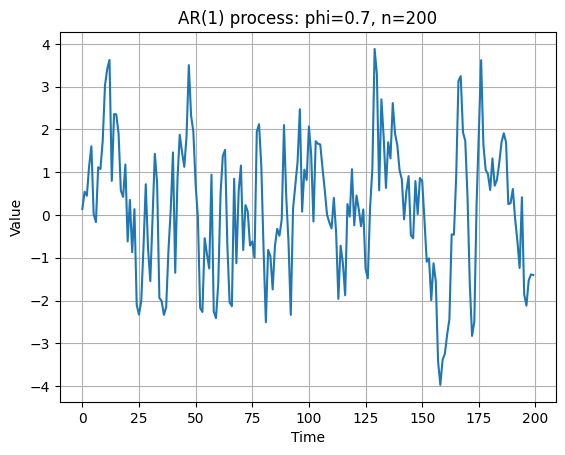

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(5445)
n = 200
phi = 0.7

# AR(1): x_t = 0.7 x_{t-1} + e_t
ar1 = arma_generate_sample(ar=[1, -phi], ma=[1], nsample=n)

plt.plot(ar1)
plt.title("AR(1) process: phi=0.7, n=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test (no constant, no trend, zero lags)
adf_ar1 = adfuller(ar1, regression='n', maxlag=0, regresults=True)

show_df_result(adf_ar1)

Augmented Dickey-Fuller Test Results
ADF Statistic: -5.958960
p-value: 0.000000
Critical Values
1% -2.58
5% -1.94
10% -1.62
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.152
Model:                            OLS   Adj. R-squared (uncentered):              0.148
Method:                 Least Squares   F-statistic:                              35.51
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                    1.14e-08
Time:                        22:31:58   Log-Likelihood:                         -307.39
No. Observations:                 199   AIC:                                      616.8
Df Residuals:                     198   BIC:                                      620.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                               

## Simulation 2: Stationary AR(1) with non-zero level

$$
y_{t} = 100 + x_t, \quad x_{t} = 0.7x_{t - 1} + e_{t}, e_t \sim N(0, 1)
$$


Text(0.5, 0, 'Time')

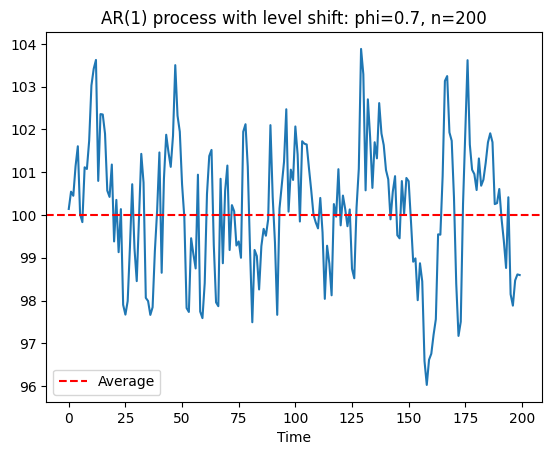

In [31]:
ar1_with_level = 100 + ar1

plt.plot(ar1_with_level)
plt.title("AR(1) process with level shift: phi=0.7, n=200")
plt.axhline(100, color='red', linestyle='--', label='Average')
plt.legend()
plt.xlabel("Time")

In [33]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test (no constant, no trend, zero lags)
adf_ar1 = adfuller(ar1_with_level, regression='n', maxlag=0, regresults=True)

show_df_result(adf_ar1)

Augmented Dickey-Fuller Test Results
ADF Statistic: -0.174481
p-value: 0.623298
Critical Values
1% -2.58
5% -1.94
10% -1.62
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                            0.03044
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                       0.862
Time:                        22:34:46   Log-Likelihood:                         -323.79
No. Observations:                 199   AIC:                                      649.6
Df Residuals:                     198   BIC:                                      652.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                               

Dickey-Fuller test with a constant still works fine in this case.

$$
\Delta y_{t} = \beta_0 + \beta_1 y_{t - 1} + e_t
$$


In [36]:
# Augmented Dickey-Fuller test (no constant, no trend, zero lags)
adf_ar1 = adfuller(ar1_with_level, regression='c', maxlag=0, regresults=True)

show_df_result(adf_ar1)

Augmented Dickey-Fuller Test Results
ADF Statistic: -5.972779
p-value: 0.000000
Critical Values
1% -3.46
5% -2.88
10% -2.57
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     35.67
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.07e-08
Time:                        22:36:49   Log-Likelihood:                -307.24
No. Observations:                 199   AIC:                             618.5
Df Residuals:                     197   BIC:                             625.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

## Simulation 3 (Stationary AR(1) with trend)

$$
y_{t} = 10 + 0.1t + x_{t}, \quad x_{t} = 0.7 x_{t - 1} + e_{t}, e_t \sim N(0, 1)
$$



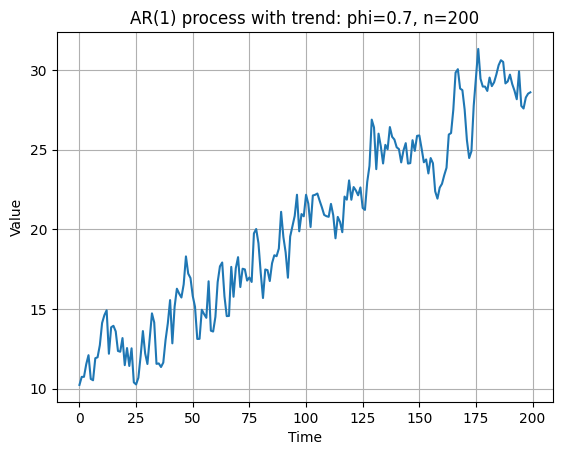

In [35]:
ar1_with_trend = 10 + 0.1 * np.arange(1, 201) + ar1

plt.plot(ar1_with_trend)
plt.title("AR(1) process with trend: phi=0.7, n=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [37]:
# Augmented Dickey-Fuller test (no constant, no trend, zero lags)
adf_trend_ar1 = adfuller(ar1_with_trend, regression='c', maxlag=0, regresults=True)

show_df_result(adf_trend_ar1)

Augmented Dickey-Fuller Test Results
ADF Statistic: -1.626834
p-value: 0.469148
Critical Values
1% -3.46
5% -2.88
10% -2.57
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.647
Date:                Tue, 02 Dec 2025   Prob (F-statistic):              0.105
Time:                        22:39:20   Log-Likelihood:                -322.47
No. Observations:                 199   AIC:                             648.9
Df Residuals:                     197   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [38]:
# Augmented Dickey-Fuller test (no constant, no trend, zero lags)
adf_trend_ar2 = adfuller(ar1_with_trend, regression='ct', maxlag=0, regresults=True)

show_df_result(adf_trend_ar2)

Augmented Dickey-Fuller Test Results
ADF Statistic: -5.980873
p-value: 0.000002
Critical Values
1% -4.00
5% -3.43
10% -3.14
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     17.90
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           7.24e-08
Time:                        22:39:53   Log-Likelihood:                -307.11
No. Observations:                 199   AIC:                             620.2
Df Residuals:                     196   BIC:                             630.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

## ADF-Test

Let us consider an AR(2) process

$$
x_{t} = \phi_1 x_{t - 1} + \phi_2 y_{t - 2} + e_t
$$

If this process has a unit root, then its characteristic equation

$$
\lambda ^2 - \phi_1 \lambda - \phi_2 = 0
$$

has a solution $\lambda^{*} = 1$, therefore, setting $\lambda = 1$ satisfies the equation, and we obtain:

$$
1^2 - \phi_1 - \phi_2 = 0
$$

Therefore, if the process has a unit root, its coefficients sum to one. This is a hypothesis that we can test using data. Following the approach of the DF-Test, we can try to construct a regression equation where one of the coefficients is $1 - \phi_1 - \phi_2$. Then we can conduct a test of the null hypothesis that this coefficient is zero.

It turns out that we can reparemetrize the AR(2) model to obtain such an equation:

$$
\begin{align}
x_{t} - x_{t - 1} & = \phi_1 x_{t - 1} - x_{t - 1} + \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 - 1)x_{t - 1} + \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 - 1)x_{t - 1} + \phi_2 x_{t - 1} - \phi_2 x_{t - 1} + \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 + \phi_2 - 1)x_{t - 1} - \phi_2 x_{t - 1} \phi_2 y_{t - 2} + e_t\\
\Delta x_{t} & = (\phi_1 + \phi_2 - 1)x_{t - 1} - \phi_2(x_{t - 1} - y_{t - 2}) + e_t\\
\Delta x_{t} & = (\phi_1 + \phi_2 - 1)x_{t - 1} - \phi_2\Delta x_{t - 1} + e_t\\
\end{align}
$$

In the general case of an AR(p) process the equation looks more complicated but it is derived in exactly the same way as for the AR(2) process:

$$
\Delta y_t = (\rho - 1) x_{t - 1} + \theta_{1} \Delta x_{t - 1} + \theta_2 \Delta y_{t - 2} + \ldots + \theta_{p - 1} \Delta y_{t - p + 1} + e_t
$$

where $\rho$ and $\theta_i$ are defined as:

$$
\rho = \sum_{j = 1}^p \alpha_j \\
\theta_i = - \sum_{j = i + 1}^{p} \alpha_j
$$

## Simulation: AR(3)

$$
y_t = 0.6x_{t - 1} + 0.4y_{t - 2} - 0.7y_{t - 2} + e_t, e_t \sim N(0, 1)
$$


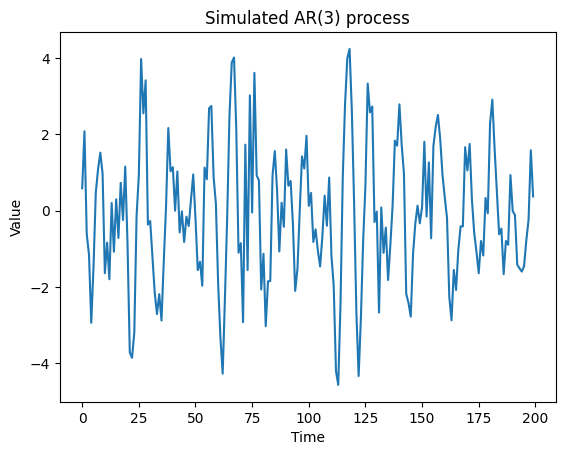

In [41]:
np.random.seed(521)
n = 200
ar_params = [1, -0.6, -0.4, 0.7]  # statsmodels uses signs: ar=[1, -phi1, -phi2, -phi3]

# Simulate AR(3) process
ar3 = arma_generate_sample(ar=ar_params, ma=[1], nsample=n)

plt.plot(ar3)
plt.title("Simulated AR(3) process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [48]:
# Augmented Dickey-Fuller test (no constant, no trend, zero lags)
adf_trend_ar2 = adfuller(ar3, regression='n', maxlag=3, regresults=True)

show_df_result(adf_trend_ar2)

Augmented Dickey-Fuller Test Results
ADF Statistic: -14.090813
p-value: 0.000000
Critical Values
1% -2.58
5% -1.94
10% -1.62
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.588
Model:                            OLS   Adj. R-squared (uncentered):              0.582
Method:                 Least Squares   F-statistic:                              92.33
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                    3.70e-37
Time:                        22:50:40   Log-Likelihood:                         -280.11
No. Observations:                 197   AIC:                                      566.2
Df Residuals:                     194   BIC:                                      576.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                              


## Application

```{r}
dt <- read_csv("https://github.com/febse/data/raw/refs/heads/main/sim.csv")
dt_ts <- ts(dt$x, start = 1990, frequency = 12)
dt_ts
```



## KPSS Test

The KPSS test considers stationarity as the null hypothesis. Let's consider the following process:

$$
y_t = \alpha_t + \beta t + e_t, e_t \sim WN(\sigma^2)
$$

where $\alpha_t$ is a random walk process: $\alpha_t = \alpha_{t - 1} + \epsilon_t$. If $y_t$ is trend-stationary (i.e. has no unit roots), then the variance of $\epsilon_t$ is zero (i.e. $\alpha_t$ is a constant process).

With the KPSS test we reject the null hypothesis (trend-stationarity)
for _large_ values of the test statistic.

**KPSS test statistic:**  
$$
\text{KPSS} = \sum_{t=1}^T \frac{S_t^2}{T^2 \hat{\sigma}^2}
$$

Where $S_t$ is the cumulative sum of residuals and $ \hat{\sigma}^2 $ is the long-run variance estimate.


In [83]:
from statsmodels.tsa.stattools import kpss

# KPSS test for rw1 (random walk)
kpss_stat_rw1, pvalue_rw1, lags_rw1, crit_rw1 = kpss(rw1, regression='ct', nlags=0)
print("KPSS test for rw1:")
print(f"Statistic: {kpss_stat_rw1:.4f}, p-value: {pvalue_rw1:.4f}, lags: {lags_rw1}")
print("Critical values:", crit_rw1)

# KPSS test for ar1 (stationary AR(1))
kpss_stat_ar1, pvalue_ar1, lags_ar1, crit_ar1 = kpss(ar1, regression='c')
print("\nKPSS test for ar1:")
print(f"Statistic: {kpss_stat_ar1:.4f}, p-value: {pvalue_ar1:.4f}, lags: {lags_ar1}")
print("Critical values:", crit_ar1)

KPSS test for rw1:
Statistic: 0.4708, p-value: 0.0100, lags: 0
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}

KPSS test for ar1:
Statistic: 0.0605, p-value: 0.1000, lags: 7
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\boyko\AppData\Local\Temp\ipykernel_24552\3801285206.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat_rw1, pvalue_rw1, lags_rw1, crit_rw1 = kpss(rw1, regression='ct', nlags=0)
C:\Users\boyko\AppData\Local\Temp\ipykernel_24552\3801285206.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat_ar1, pvalue_ar1, lags_ar1, crit_ar1 = kpss(ar1, regression='c')


In [84]:
df_rw["t"] = np.arange(len(df_rw))

fit_rw_trend = ols("rw1 ~ 1 + t", data = df_rw).fit()

fit_rw_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rw1   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           4.17e-23
Time:                        23:16:29   Log-Likelihood:                -203.97
No. Observations:                 100   AIC:                             411.9
Df Residuals:                      98   BIC:                             417.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1663      0.373      3.126      0.002       0.426       1.907
t             -0.0848      0.007    -13.026      0.000      -0.098      -0.072
==============================================================================
Omnibus:                        0.776   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.844
Skew:                           0.081   Prob(JB):                        0.656
Kurtosis:                       2.580   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
r = fit_rw_trend.resid

In [86]:
# r = fit_rw_trend.resid  # residuals from OLS regression
T = len(r)
S = r.cumsum()
sigma2 = np.var(r, ddof=1)

kpss_manual = np.sum(S ** 2) / (T ** 2 * sigma2)
print("KPSS statistic (manual calculation):", kpss_manual)

KPSS statistic (manual calculation): 0.4661393812384587
